In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os   
import sys
import warnings

In [2]:

! pip install seaborn
import seaborn as sns

In [3]:
df = pd.read_csv('sneakers_streetwear_sales_data.csv')
df.head()

,Date,Product Name,Product Type,Brand,Gender,Category,Country,Quantity,Unit Price ($),Amount ($),Payment Mode
0,2022-05-27,Fear of God Essentials Tee,T-shirt,Essentials,Unisex,Limited Edition,Japan,5,141.82,709.10,Card
1,2022-08-22,Yeezy Boost 350,Sneakers,Adidas,Unisex,Streetwear,USA,2,267.34,534.68,Cash on Delivery
2,2022-04-03,Nike Dunk Low,Sneakers,Nike,Women,Limited Edition,Germany,1,292.00,292.00,Cash on Delivery
3,2022-07-13,Nike Tech Fleece,Hoodie,Nike,Men,Limited Edition,USA,4,245.44,981.76,Cash on Delivery
4,2022-08-25,Jordan 1 High,Sneakers,Nike,Women,Casual,Australia,2,184.51,369.02,Cash on Delivery


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            353 non-null    object 
 1   Product Name    353 non-null    object 
 2   Product Type    353 non-null    object 
 3   Brand           353 non-null    object 
 4   Gender          353 non-null    object 
 5   Category        353 non-null    object 
 6   Country         353 non-null    object 
 7   Quantity        353 non-null    int64  
 8   Unit Price ($)  353 non-null    float64
 9   Amount ($)      353 non-null    float64
 10  Payment Mode    353 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 30.5+ KB


In [5]:
df.describe()

,Quantity,Unit Price ($),Amount ($)
count,353.000000,353.000000,353.000000
mean,3.107649,174.607054,547.034193
std,1.408083,71.625710,343.084461
min,1.000000,50.100000,50.100000
25%,2.000000,113.750000,268.780000
50%,3.000000,175.510000,494.400000
75%,4.000000,235.500000,783.930000
max,5.000000,299.730000,1496.500000


In [6]:
df.isnull().sum()

Date              0
Product Name      0
Product Type      0
Brand             0
Gender            0
Category          0
Country           0
Quantity          0
Unit Price ($)    0
Amount ($)        0
Payment Mode      0
dtype: int64

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dt.year

0      2022
1      2022
2      2022
3      2022
4      2022
       ... 
348    2022
349    2022
350    2022
351    2022
352    2022
Name: Date, Length: 353, dtype: int32

In [8]:
#Total revenue made by the company
total_sales= df['Amount ($)'].sum()
print(f'Total Sales: ${total_sales:,.2f}')

Total Sales: $193,103.07


In [9]:
#Most sold Product
most_sold = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False)
print(most_sold)



Product Name
Off-White Hoodie              143
Nike Tech Fleece              140
Yeezy Boost 350               119
Puma Joggers                  116
Jordan 1 High                 113
Nike Dunk Low                 112
Supreme Hoodie                 95
Adidas Ultraboost              91
New Era Cap                    88
Fear of God Essentials Tee     80
Name: Quantity, dtype: int64


In [10]:
# Sales by Country 
sales_by_country = df.groupby('Country')['Amount ($)'].sum().sort_values(ascending=False)
print(sales_by_country)


Country
Japan        31587.39
Canada       30851.19
Germany      29822.89
UK           29739.25
USA          26095.59
Australia    24094.02
India        20912.74
Name: Amount ($), dtype: float64


In [11]:
# Popular Payment Methods
popular_payment_methods = df['Payment Mode'].value_counts()
print(popular_payment_methods)

Payment Mode
Cash on Delivery    102
Card                 89
Wallet               89
UPI                  73
Name: count, dtype: int64


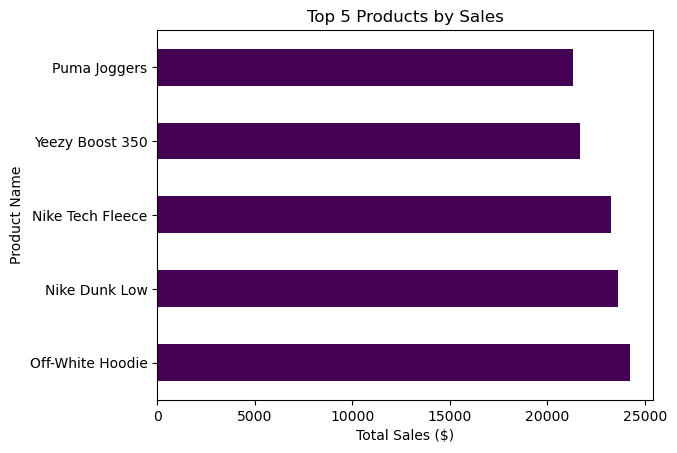

C:\Users\kndll\AppData\Local\Temp\ipykernel_14304\3129354358.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Amount ($)', palette='coolwarm')


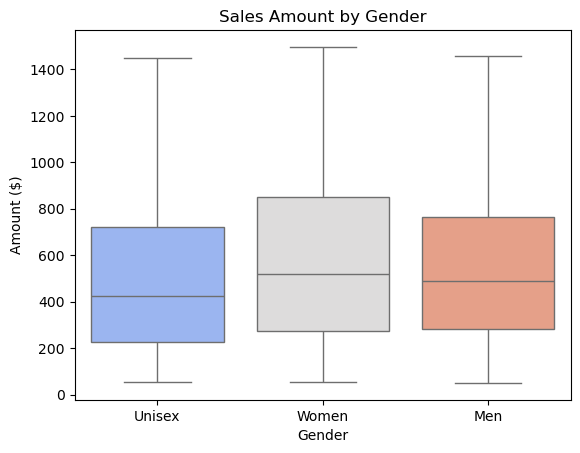

In [12]:
# Visuallzing insights


# Top 5 selling products
top_products = df.groupby('Product Name')['Amount ($)'].sum().sort_values(ascending=False).head(5)
top_products.plot(kind='barh', title='Top 5 Products by Sales', colormap='viridis')
plt.xlabel("Total Sales ($)")
plt.show()

# Sales by Gender
sns.boxplot(data=df, x='Gender', y='Amount ($)', palette='coolwarm')
plt.title('Sales Amount by Gender')
plt.show()


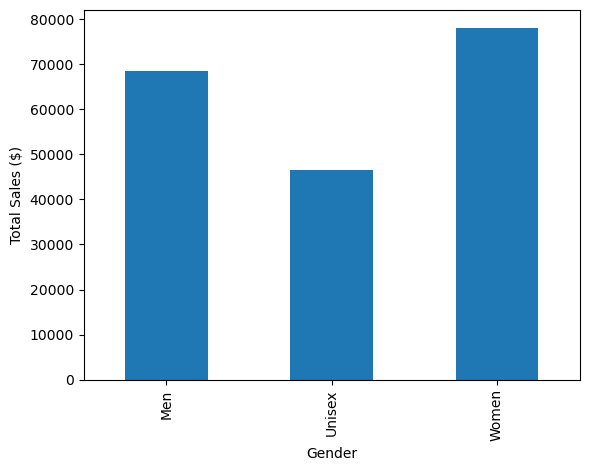

In [13]:
total_by_gender = df.groupby('Gender')['Amount ($)'].sum()
total_by_gender.plot(kind='bar')
plt.ylabel('Total Sales ($)')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
features = df[['Quantity', 'Unit Price ($)', 'Gender', 'Brand']]
target = df['Amount ($)']
features_encoded = pd.get_dummies(features, columns=['Gender', 'Brand'])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
model = LinearRegression()

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 11816.57
R^2 Score: 0.90


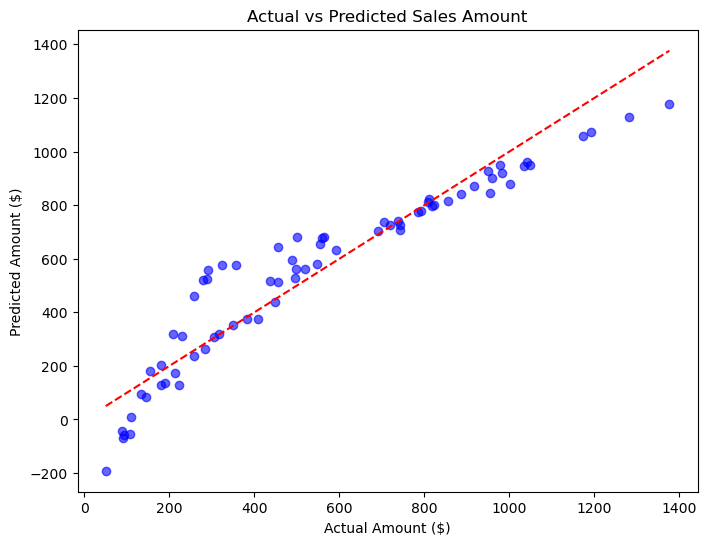

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line

plt.xlabel('Actual Amount ($)')
plt.ylabel('Predicted Amount ($)')
plt.title('Actual vs Predicted Sales Amount')
plt.show()

In [19]:
! pip install xgboost
from xgboost import XGBRegressor # type: ignore


In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
!

In [21]:
rf=RandomForestRegressor()
dt=DecisionTreeRegressor()
ada=AdaBoostRegressor()
gb=GradientBoostingRegressor()
xg=XGBRegressor()

In [22]:
models=[rf,dt,ada,gb,xg]

In [23]:
def modelTrainingAndEvalution(model):
  model.fit(X_train,y_train)
  y_predict=model.predict(X_test)
  accuracy=r2_score(y_predict,y_test)
  print(f'The accuracy of {model} is {accuracy}')

In [24]:
for i in models:
  modelTrainingAndEvalution(i)

The accuracy of RandomForestRegressor() is 0.9985201610872338
The accuracy of DecisionTreeRegressor() is 0.9975438999270959
The accuracy of AdaBoostRegressor() is 0.9541877907440479
The accuracy of GradientBoostingRegressor() is 0.9981956514016315
The accuracy of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tr

In [25]:
from pycaret.regression import *
from pycaret.datasets import get_data

reg_setup = setup(
    data=df,    
    target='Amount ($)',
    session_id=123,        # for reproducibility
)



,Description,Value
0,Session id,123
1,Target,Amount ($)
2,Target type,Regression
3,Original data shape,"(353, 11)"
4,Transformed data shape,"(353, 46)"
5,Transformed train set shape,"(247, 46)"
6,Transformed test set shape,"(106, 46)"
7,Numeric features,2
8,Date features,1
9,Categorical features,7


In [26]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,11.6562,376.4723,18.3506,0.9966,0.0583,0.0357,0.0850
gbr,Gradient Boosting Regressor,16.8759,586.9323,23.5910,0.9944,0.0654,0.0457,0.0570
rf,Random Forest Regressor,18.7348,710.9252,26.2080,0.9935,0.0756,0.0520,0.0970
xgboost,Extreme Gradient Boosting,18.7345,714.7161,26.1300,0.9934,0.0728,0.0507,0.0590
lightgbm,Light Gradient Boosting Machine,23.7702,1020.6560,31.2454,0.9906,0.0834,0.0608,0.0850
dt,Decision Tree Regressor,24.6646,1290.0825,35.4347,0.9876,0.1015,0.0663,0.0370
ada,AdaBoost Regressor,63.3747,5737.5422,75.3992,0.9451,0.2491,0.2141,0.0550
omp,Orthogonal Matching Pursuit,78.9454,11328.7314,105.7920,0.8899,0.3903,0.3257,0.0370
br,Bayesian Ridge,80.5599,11863.9239,108.2405,0.8851,0.4756,0.3223,0.0370
lasso,Lasso Regression,80.0151,11841.8069,108.1296,0.8850,0.4494,0.3299,0.2860


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [28]:
models=[]
models.append(('Linear Regression',LinearRegression()))
models.append(('Ridge',Ridge()))
models.append(('Lasso',Lasso()))
models.append(('Elastic Net',ElasticNet()))
models.append(('SVR',SVR()))
models.append(('Decision Tree Regressor',DecisionTreeRegressor()))
models.append(('Random Forest Regressor',RandomForestRegressor()))
models.append(('Gradient Boosting Regressor',GradientBoostingRegressor()))
models.append(('Ada Boost Regressor',AdaBoostRegressor()))
models.append(('XGB Regressor',XGBRegressor()))
models.append(('KNeighbors Regressor',KNeighborsRegressor()))
models.append(('MLPRegressor',MLPRegressor()))

In [29]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
record={
    'Model Name' : [],
    'R2 Score':[],
    'Mean Absolute Error':[],
    'Root Mean Squared Error' :[]
}
for name,model in models:
  m=model.fit(X_train,y_train)
  y_predict=m.predict(X_test)
  record['Model Name'].append(name)
  record['R2 Score'].append(r2_score(y_test,y_predict)*100)
  record['Mean Absolute Error'].append(mean_absolute_error(y_test,y_predict))
  record['Root Mean Squared Error'].append(mean_squared_error(y_test,y_predict))


In [30]:
record=pd.DataFrame(record)
record

,Model Name,R2 Score,Mean Absolute Error,Root Mean Squared Error
0,Linear Regression,89.683922,81.470513,11816.565994
1,Ridge,89.726530,81.336910,11767.760511
2,Lasso,90.033996,80.234428,11415.573704
3,Elastic Net,90.578886,76.618500,10791.428663
4,SVR,7.204153,271.478620,106293.134241
5,Decision Tree Regressor,99.763604,11.609155,270.780630
6,Random Forest Regressor,99.831838,9.765524,192.621563
7,Gradient Boosting Regressor,99.821094,10.327809,204.928358
8,Ada Boost Regressor,96.383491,56.270415,4142.535484
9,XGB Regressor,99.852391,9.813119,169.079193


In [31]:
from sklearn.model_selection import GridSearchCV
# Define the model
rf = RandomForestRegressor(random_state=42)
# Define a smaller parameter grid to prevent overload
param_grid = {
    'n_estimators': [100, 200],           # Reduced range
    'max_depth': [5, 10],                 # Avoid very deep trees
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
# Initialize GridSearchCV (Safe Configuration)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=1,                # Avoids BrokenPipeError in Colab/Jupyter
    pre_dispatch='2*n_jobs', # Prevents overloading job queue
    scoring='r2',
    verbose=0
)
#Fit on training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters from Grid Search:", grid_search.best_params_)
print("Best CV R² Score from Grid Search:", grid_search.best_score_)

# Evaluate on test data
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Test R² Score:", r2_score(y_test, y_pred))


Best Parameters from Grid Search: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV R² Score from Grid Search: 0.995967603712564
Test R² Score: 0.998547995959097


In [32]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# ✅ Define XGBoost model
xg = XGBRegressor(objective='reg:squarederror', random_state=42)

# ✅ Define a proper parameter grid for XGBRegressor
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# ✅ Initialize GridSearchCV with safe configuration
grid_search = GridSearchCV(
    estimator=xg,
    param_grid=param_grid,
    cv=3,                   # Using 3-fold to reduce computation
    n_jobs=1,               # Avoid BrokenPipeError
    pre_dispatch='2*n_jobs',
    scoring='r2',
    verbose=1
)

# ✅ Fit on training data
grid_search.fit(X_train, y_train)

# ✅ Get the best parameters and score
print("✅ Best Parameters from Grid Search:", grid_search.best_params_)
print("✅ Best CV R² Score from Grid Search:", grid_search.best_score_)

# ✅ Evaluate on test data
best_random = grid_search.best_estimator_
y_pred = best_random.predict(X_test)
print("✅ Test R² Score:", r2_score(y_test, y_pred))


Fitting 3 folds for each of 48 candidates, totalling 144 fits
✅ Best Parameters from Grid Search: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
✅ Best CV R² Score from Grid Search: 0.9972207023919958
✅ Test R² Score: 0.9979749847281482


In [33]:
import joblib

In [34]:
# save the model 
joblib.dump(best_random, 'best_xgb_model.pkl')
print(" Model saved as 'best_xgb_model.pkl'")

 Model saved as 'best_xgb_model.pkl'


In [35]:
# load model when needed 
loaded_model = joblib.load('best_xgb_model.pkl')
print(" Model loaded successfully")

# Test loading Work
print("loaded model test R² Score:", r2_score(y_test, loaded_model.predict(X_test)))

 Model loaded successfully
loaded model test R² Score: 0.9979749847281482


In [36]:
# label encoding 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Fit the label
le.fit(df['Brand'])
# Transform the 'Brand' column
df['Brand'] = le.transform(df['Brand'])
# Save the label encoder
joblib.dump(le, 'brand_label_encoder.pkl')





['brand_label_encoder.pkl']

In [37]:
df.head()

,Date,Product Name,Product Type,Brand,Gender,Category,Country,Quantity,Unit Price ($),Amount ($),Payment Mode
0,2022-05-27,Fear of God Essentials Tee,T-shirt,1,Unisex,Limited Edition,Japan,5,141.82,709.10,Card
1,2022-08-22,Yeezy Boost 350,Sneakers,0,Unisex,Streetwear,USA,2,267.34,534.68,Cash on Delivery
2,2022-04-03,Nike Dunk Low,Sneakers,3,Women,Limited Edition,Germany,1,292.00,292.00,Cash on Delivery
3,2022-07-13,Nike Tech Fleece,Hoodie,3,Men,Limited Edition,USA,4,245.44,981.76,Cash on Delivery
4,2022-08-25,Jordan 1 High,Sneakers,3,Women,Casual,Australia,2,184.51,369.02,Cash on Delivery


<Figure size 1000x600 with 0 Axes>

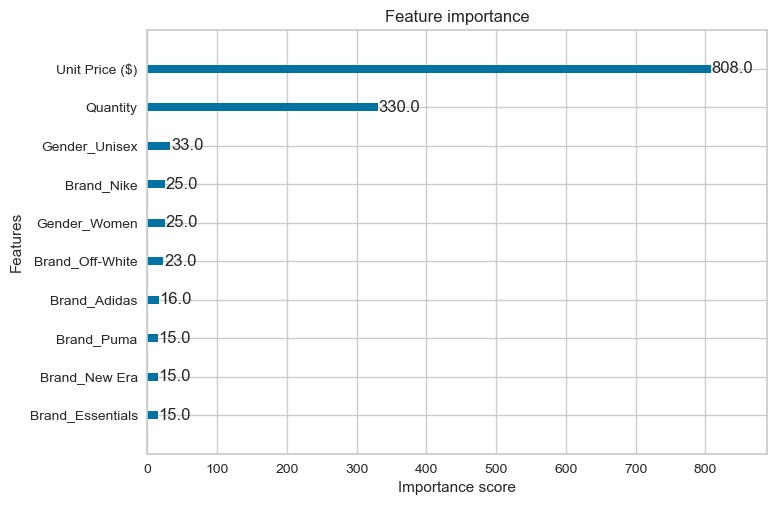

In [38]:
from xgboost import plot_importance
plt.figure(figsize=(10, 6))
plot_importance(best_random, importance_type='weight', max_num_features=10)
plt.show()

